In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
df = pd.read_csv('VOF.L.csv', usecols=[4])
df.head()

,Close
0,326.00
1,331.75
2,342.00
3,352.00
4,350.00


In [68]:
df.shape

(1262, 1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1262 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [70]:
df.describe()

,Close
count,1262.000000
mean,387.623811
std,74.004481
min,214.000000
25%,331.000000
50%,348.250000
75%,459.375000
max,545.000000


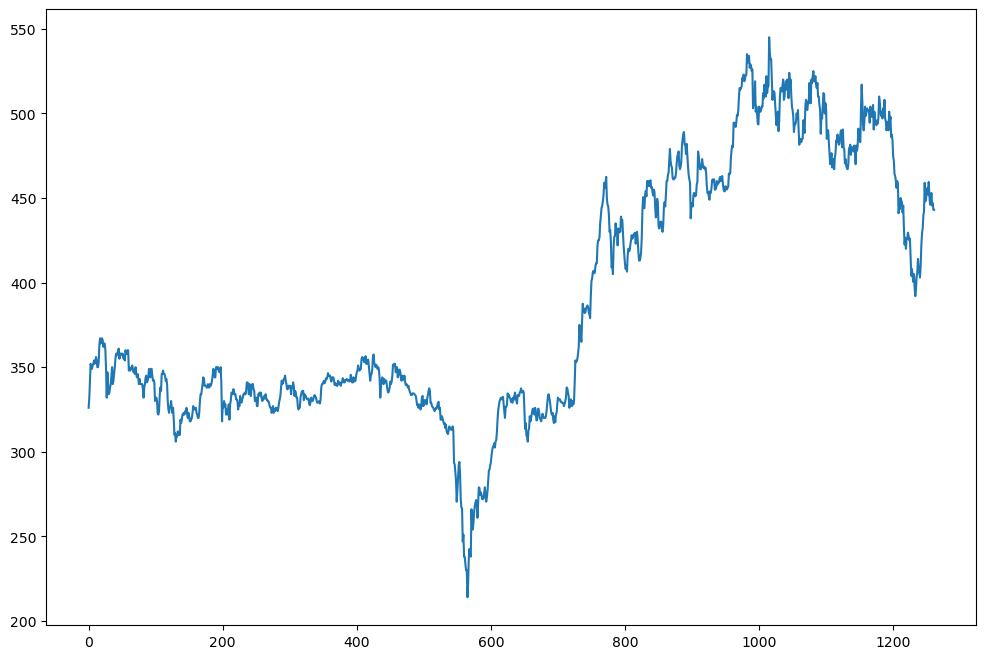

In [71]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Close Price History')

In [72]:
train_length = int(len(df)*0.8)
train=df.iloc[:train_length]
test=df.iloc[train_length:]
print(train.shape,test.shape)

(1009, 1) (253, 1)


In [73]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [74]:
from sklearnex.svm import SVR
model = SVR()
model.fit(X_train, y_train)

SVR()

In [75]:
train_pred=model.predict(X_train)

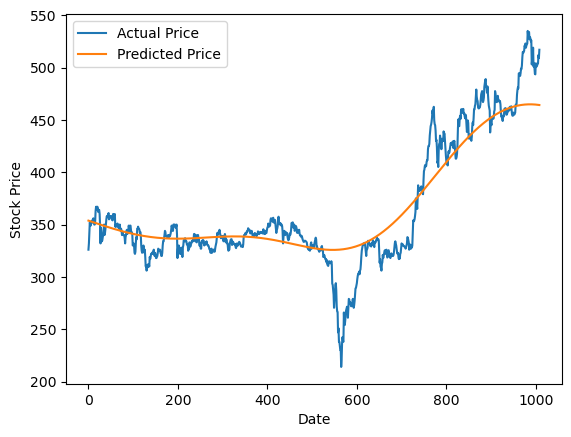

In [76]:
#Train set graph
plt.plot(y_train, label='Actual Price')
plt.plot(X_train, train_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [77]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [78]:
test_pred=model.predict(X_test)

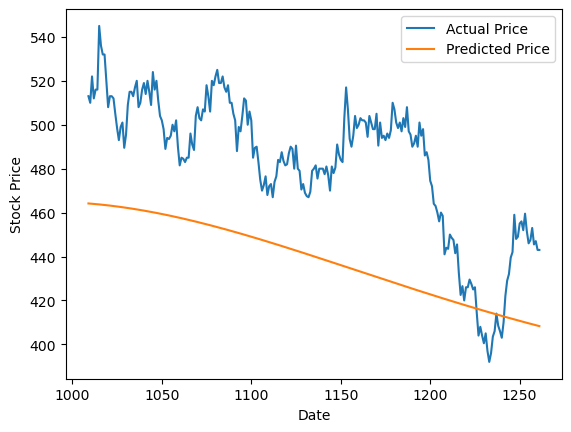

In [79]:
#Test graph
plt.plot(y_test, label='Actual Price')
plt.plot(X_test, test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [80]:
print('Test r2 score:', r2_score(y_test, test_pred))
print('Test mean absolute error:', mean_absolute_error(y_test,test_pred))
print('Test mean absolute percentage error:', mean_absolute_percentage_error(y_test,test_pred))
trainScore = math.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test r2 score: -1.2646330624895286
Test mean absolute error: 44.45939448659004
Test mean absolute percentage error: 0.09034771461886147
Train Score: 24.08 RMSE
Test Score: 48.42 RMSE


In [81]:
test_pred

array([464.15757305, 464.09174177, 464.02313009, 463.95175424,
       463.87763058, 463.8007756 , 463.72120595, 463.63893838,
       463.5539898 , 463.46637723, 463.37611783, 463.28322885,
       463.18772771, 463.08963191, 462.98895908, 462.88572696,
       462.77995342, 462.67165641, 462.56085401, 462.44756439,
       462.33180583, 462.2135967 , 462.09295549, 461.96990075,
       461.84445116, 461.71662547, 461.58644251, 461.45392121,
       461.31908059, 461.18193974, 461.04251782, 460.90083408,
       460.75690784, 460.6107585 , 460.46240551, 460.31186841,
       460.15916678, 460.0043203 , 459.84734866, 459.68827166,
       459.52710911, 459.36388091, 459.19860698, 459.03130733,
       458.86200197, 458.69071098, 458.51745449, 458.34225266,
       458.16512567, 457.98609377, 457.80517723, 457.62239633,
       457.43777142, 457.25132283, 457.06307097, 456.87303623,
       456.68123902, 456.48769981, 456.29243905, 456.09547721,
       455.89683477, 455.69653225, 455.49459014, 455.29